In [2]:
import pandas as pd
import glob
import xarray as xr
import numpy as np
from statsmodels.stats.anova import AnovaRM 
from scipy import stats
from matplotlib import pyplot as plt
import pingouin as pg
import numpy as np

In [4]:
vn = ['fusiform-rh', 'fusiform-lh', 'lingual-rh', 'lingual-lh', 'cuneus-rh', 'cuneus-lh', 'lateraloccipital-rh', 'lateraloccipital-lh']

In [5]:
#BETWEEN-SUBJECT VARIANCE VALUES
subjects = []
xarrays = glob.glob(f'/Users/lina_01/Desktop/mpi_lemon/undirected_outputs/coh/*_coh_EO.nc')
for array in xarrays:
    subject = array.split('/')[7].split('_')[0]
    subjects.append(subject)

mean_per_subject = []
for subject in subjects:
    xarray = xr.open_dataarray(f'/Users/lina_01/Desktop/mpi_lemon/undirected_outputs/coh/{subject}_array_coh_EO.nc')
    xarray_sel = xarray.sel(region1=vn, region2=vn)
    mean = float(xarray_sel.mean())
    mean_per_subject.append(mean)

#WITHIN-SUBJECT VARIANCE VALUES
xarray = xr.open_dataarray('/Users/lina_01/Desktop/mpi_lemon/undirected_outputs/coh/sub-032304_array_coh_EO.nc')

mean_per_sample = []
for sample in range(0,100):
    xarray_sel = xarray.sel(bootstrap_samples=sample, region1=vn, region2=vn)
    mean = float(xarray_sel.mean())
    mean_per_sample.append(mean)

In [15]:
sub_nums = list(range(1,113))

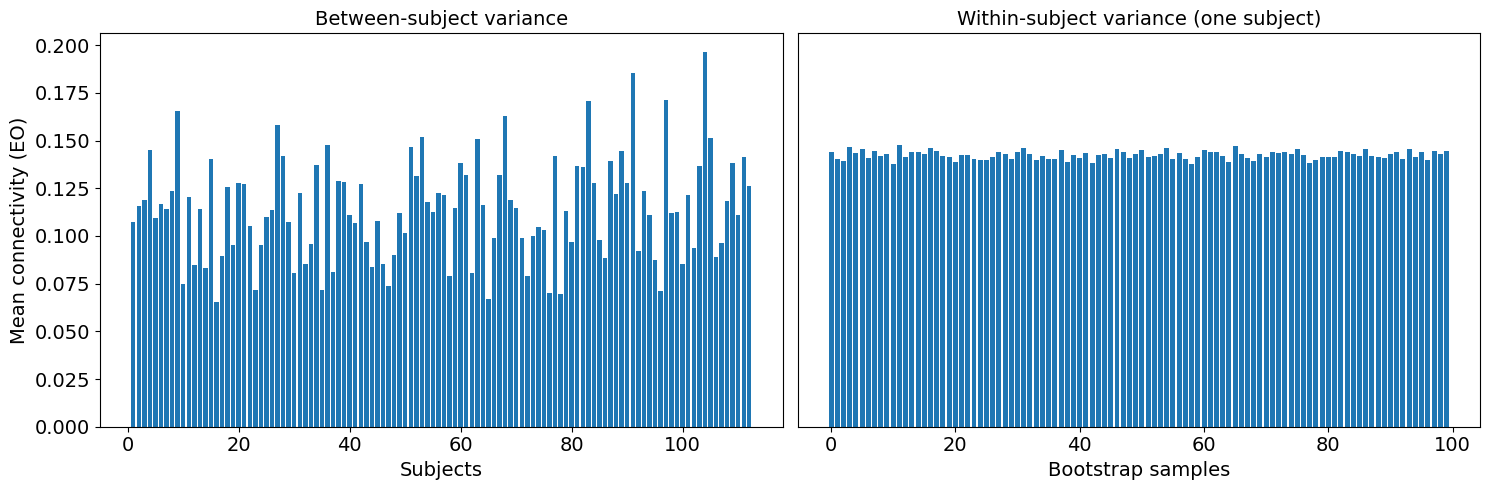

In [30]:
#PLOTTING
fig, axes = plt.subplots(1,2,figsize=(15,5))

graph_values = mean_per_subject
axes[0].bar(sub_nums, graph_values)
axes[0].set_xlabel('Subjects',fontsize=14)
axes[0].set_ylabel('Mean connectivity (EO)',fontsize=14)
axes[0].set_title('Between-subject variance',fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

sample_labels = list(range(0,100))
graph_values = mean_per_sample
axes[1].bar(sample_labels, graph_values)
axes[1].set_xlabel('Bootstrap samples',fontsize=14)
axes[1].set_title('Within-subject variance (one subject)',fontsize=14)
axes[1].set_yticks([])
axes[1].set_ylim(0,0.2)
axes[1].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
plt.savefig('example_variance.png',dpi=300)